<a href="https://colab.research.google.com/github/gyeongee/TIL/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%cd '/content/drive/MyDrive/Colab Notebooks/2507_미니프로젝트'

/content/drive/MyDrive/Colab Notebooks/2507_미니프로젝트


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2507_미니프로젝트/data_students.csv')
df.head(3)

,Marital status,Application mode,Application order,Course,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Daytime/evening attendance
0,single,17,5,Animation and Multimedia Design,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,daytime
1,single,15,1,Tourism,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,daytime
2,single,1,5,Communication Design,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,daytime


Curricular units 1st sem (approved) 1학기 이수한(합격한) 교과목 수

In [ ]:
df['Curricular units 1st sem (approved)_cut']=pd.cut(df['Curricular units 1st sem (approved)'],bins=[0,1,3,4,5,6,df['Curricular units 1st sem (approved)'].max()],
                                                     labels=['0개 이수','1~3개 이수','4개 이수','5개 이수','6개 이수','6개 이상 이수'], include_lowest=True)

df['Curricular units 1st sem (approved)_cut'].value_counts(normalize=True)

Curricular units 2nd sem (approved) 2학기 이수한(합격한) 교과목 수도 1학기와 같은 기준으로 나누기

In [ ]:
df['Curricular units 2nd sem (approved)'].value_counts(normalize=True)

In [ ]:
# 구간화 진행

df['Curricular units 2nd sem (approved)'].value_counts(normalize=True)
df['Curricular units 2nd sem (approved)_cut']=pd.cut(df['Curricular units 2nd sem (approved)'],bins=[0,1,3,4,5,6,df['Curricular units 2nd sem (approved)'].max()],
                                                     labels=['0개 이수','1~3개 이수','4개 이수','5개 이수','6개 이수','6개 이상 이수'], include_lowest=True)
# 구간이 정해지지 않은 값 확인하기
df['Curricular units 2nd sem (approved)_cut'].value_counts(dropna=False)

In [ ]:
df.loc[df['Curricular units 2nd sem (approved)_cut'].isna(),
       ['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (approved)_cut']]

인코딩 진행

In [ ]:
df['2학기_이수과목수_cut']=df['Curricular units 2nd sem (approved)_cut'].cat.codes
df['1학기_이수과목수_cut']=df['Curricular units 1st sem (approved)_cut'].cat.codes

In [ ]:
# Curricular units 1st sem (grade)

In [5]:
df['Curricular units 1st sem (grade)'].describe()

,Curricular units 1st sem (grade)
count,4424.000000
mean,10.640822
std,4.843663
min,0.000000
25%,11.000000
50%,12.285714
75%,13.400000
max,18.875000


<Axes: ylabel='Frequency'>

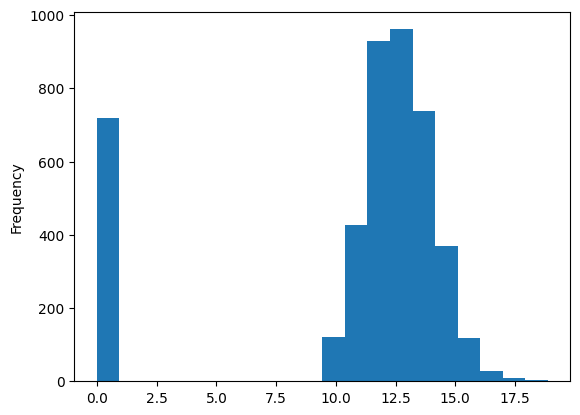

In [6]:
import matplotlib.pyplot as plt
df['Curricular units 1st sem (grade)'].plot(kind='hist', bins=20)
# 성적이 0인 사람들은

In [9]:
len(df[df['Curricular units 1st sem (grade)']==0])/len(df)

0.16229656419529837

성적이 0인 사람들 중 Dropout 비율이 높음

In [10]:
df[df['Curricular units 1st sem (grade)']==0]['Target'].value_counts(normalize=True)

,proportion
Target,
Dropout,0.793872
Graduate,0.107242
Enrolled,0.098886


In [15]:
df['Curricular units 1st sem (grade)_cut']=pd.cut(df['Curricular units 1st sem (grade)'],bins=[0,11,12,13,df['Curricular units 1st sem (grade)'].max()],
                                                     labels=['0점','11점 이하','12점 이하','13점 이상'], include_lowest=True)
# 구간이 정해지지 않은 값 확인하기
df['Curricular units 1st sem (grade)_cut'].value_counts(dropna=False)

,count
Curricular units 1st sem (grade)_cut,
13점 이상,1404
0점,1160
12점 이하,1005
11점 이하,855


In [16]:
df['Curricular units 1st sem (grade)_cut'].value_counts(normalize=True)

,proportion
Curricular units 1st sem (grade)_cut,
13점 이상,0.317360
0점,0.262206
12점 이하,0.227170
11점 이하,0.193264


In [18]:
df[df['Curricular units 1st sem (grade)_cut']=='13점 이상']['Target'].value_counts(normalize=True)

,proportion
Target,
Graduate,0.760684
Dropout,0.120370
Enrolled,0.118946


In [19]:
# Curricular units 2nd sem (grade)
df['Curricular units 2nd sem (grade)_cut']=pd.cut(df['Curricular units 2nd sem (grade)'],bins=[0,11,12,13,df['Curricular units 2nd sem (grade)'].max()],
                                                     labels=['0점','11점 이하','12점 이하','13점 이상'], include_lowest=True)
# 구간이 정해지지 않은 값 확인하기
df['Curricular units 2nd sem (grade)_cut'].value_counts(dropna=False)

,count
Curricular units 2nd sem (grade)_cut,
13점 이상,1366
0점,1306
12점 이하,975
11점 이하,777


점수가 0점인 학생들의 Dropout 비율이

In [34]:
df[df['Curricular units 1st sem (grade)_cut']=='0점']['Target'].value_counts(normalize=True)

,proportion
Target,
Dropout,0.662069
Enrolled,0.179310
Graduate,0.158621


In [35]:
df[df['Curricular units 1st sem (grade)_cut']=='11점 이하']['Target'].value_counts(normalize=True)

,proportion
Target,
Graduate,0.418713
Dropout,0.322807
Enrolled,0.258480


In [45]:
df[df['Curricular units 1st sem (grade)_cut']=='13점 이상']['Target'].value_counts(normalize=True)

,proportion
Target,
Graduate,0.760684
Dropout,0.120370
Enrolled,0.118946


/tmp/ipython-input-48-1812698010.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dropout_counts, x='Grade Group', y='Dropout Count', palette='pastel')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


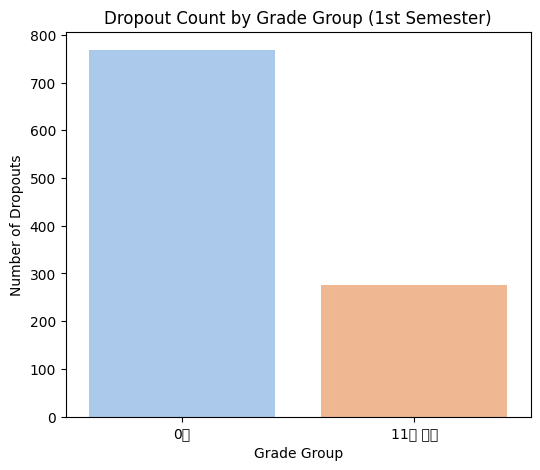

In [48]:
dropout_counts = pd.DataFrame({
    'Grade Group': ['0점', '11점 이하'],
    'Dropout Count': [
        len(df[(df['Curricular units 1st sem (grade)_cut']=='0점') & (df['Target']=='Dropout')]),
        len(df[(df['Curricular units 1st sem (grade)_cut']=='11점 이하') & (df['Target']=='Dropout')])
    ]
})

# Barplot 시각화
plt.figure(figsize=(6,5))
sns.barplot(data=dropout_counts, x='Grade Group', y='Dropout Count', palette='pastel')
plt.title('Dropout Count by Grade Group (1st Semester)')
plt.ylabel('Number of Dropouts')
plt.show()

In [32]:
df[df['Curricular units 2nd sem (grade)_cut']=='0점']['Target'].value_counts(normalize=True)

,proportion
Target,
Dropout,0.710567
Enrolled,0.172282
Graduate,0.117152


In [33]:
df[df['Curricular units 2nd sem (grade)_cut']=='11점 이하']['Target'].value_counts(normalize=True)

,proportion
Target,
Graduate,0.468468
Enrolled,0.277992
Dropout,0.253539


In [31]:
df[df['Curricular units 2nd sem (grade)_cut']=='13점 이상']['Target'].value_counts(normalize=True)

,proportion
Target,
Graduate,0.777452
Enrolled,0.112006
Dropout,0.110542


Admission grade(입학성적) 구간화

In [90]:
df['Admission grade'].describe()

,Admission grade
count,4424.000000
mean,126.978119
std,14.482001
min,95.000000
25%,117.900000
50%,126.100000
75%,134.800000
max,190.000000


<Axes: ylabel='Frequency'>

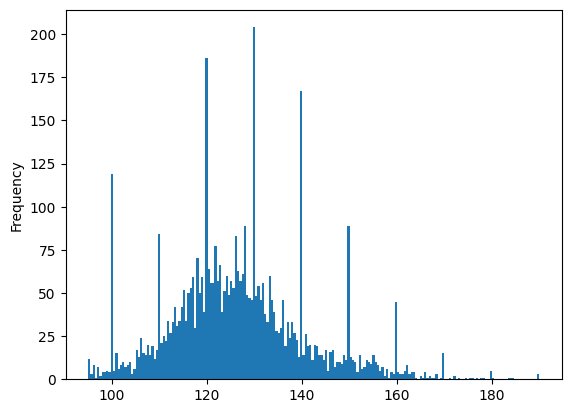

In [91]:
df['Admission grade'].plot(kind='hist', bins=200)

In [98]:
# df['Admission grade_cut']=pd.cut(df['Admission grade'],bins=[0,100,120,130,140,df['Admission grade'].max()],
#                                                      labels=['100점이하', '120점 이하', '130점 이하', '140점 이하', '140점 초과'], include_lowest=True)
# # 구간이 정해지지 않은 값 확인하기
# df['Admission grade_cut'].value_counts(dropna=False)

,count
Admission grade_cut,
130점 이하,1392
120점 이하,1311
140점 이하,893
140점 초과,662
100점이하,166


In [104]:
df['Admission grade_cut']=pd.cut(df['Admission grade'],bins=[0,120,df['Admission grade'].max()],
                                                     labels=['120점이하', '120점 초과'], include_lowest=True)
# 구간이 정해지지 않은 값 확인하기
df['Admission grade_cut'].value_counts(dropna=False)

,count
Admission grade_cut,
120점 초과,2947
120점이하,1477


In [100]:
df['Admission grade_cut'].value_counts(normalize=True)

,proportion
Admission grade_cut,
130점 이하,0.314647
120점 이하,0.296338
140점 이하,0.201854
140점 초과,0.149638
100점이하,0.037523


120점 이하에서 Dropout할 확률이 높음

In [105]:
df.groupby('Admission grade_cut')['Target'].value_counts(normalize=True)

/tmp/ipython-input-105-1554462688.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Admission grade_cut')['Target'].value_counts(normalize=True)


Admission grade_cut  Target  
120점이하               Graduate    0.410968
                     Dropout     0.398781
                     Enrolled    0.190251
120점 초과              Graduate    0.543604
                     Dropout     0.282321
                     Enrolled    0.174075
Name: proportion, dtype: float64

In [103]:
# df.groupby('Admission grade_cut')['Target'].value_counts(normalize=True)

/tmp/ipython-input-103-1554462688.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Admission grade_cut')['Target'].value_counts(normalize=True)


Admission grade_cut  Target  
100점이하               Dropout     0.518072
                     Graduate    0.289157
                     Enrolled    0.192771
120점 이하              Graduate    0.426392
                     Dropout     0.383677
                     Enrolled    0.189931
130점 이하              Graduate    0.515805
                     Dropout     0.290948
                     Enrolled    0.193247
140점 이하              Graduate    0.552072
                     Dropout     0.278835
                     Enrolled    0.169093
140점 초과              Graduate    0.590634
                     Dropout     0.268882
                     Enrolled    0.140483
Name: proportion, dtype: float64

In [107]:
df['Course'].nunique()

17

Agronomy,Basic Education,Biofuel Production Technologies,Equinculture,Informatics Engineering,Management (evening attendance) -> Dropout이 40%가 넘는 과목

위 과목을 듣는 학생들은 Dropout할 확률이 높음

In [110]:
df.groupby('Course')['Target'].value_counts(normalize=True)

Course                                Target  
Advertising and Marketing Management  Graduate    0.466418
                                      Dropout     0.354478
                                      Enrolled    0.179104
Agronomy                              Graduate    0.414286
                                      Dropout     0.409524
                                      Enrolled    0.176190
Animation and Multimedia Design       Graduate    0.446512
                                      Dropout     0.381395
                                      Enrolled    0.172093
Basic Education                       Dropout     0.442708
                                      Graduate    0.296875
                                      Enrolled    0.260417
Biofuel Production Technologies       Dropout     0.666667
                                      Enrolled    0.250000
                                      Graduate    0.083333
Communication Design                  Graduate    0.588496
                                      Dropout     0.225664
                                      Enrolled    0.185841
Equinculture                          Dropout     0.553191
                                      Graduate    0.297872
                                      Enrolled    0.148936
Informatics Engineering               Dropout     0.541176
                                      Enrolled    0.376471
                                      Graduate    0.082353
Journalism and Communication          Graduate    0.592145
                                      Dropout     0.305136
                                      Enrolled    0.102719
Management                            Graduate    0.363158
                                      Dropout     0.352632
                                      Enrolled    0.284211
Management (evening attendance)       Dropout     0.507463
                                      Graduate    0.291045
                                      Enrolled    0.201493
Nursing                               Graduate    0.715405
                                      Dropout     0.154047
                                      Enrolled    0.130548
Oral Hygiene                          Graduate    0.418605
                                      Dropout     0.383721
                                      Enrolled    0.197674
Social Service                        Graduate    0.698592
                                      Dropout     0.183099
                                      Enrolled    0.118310
Social Service (evening attendance)   Graduate    0.572093
                                      Dropout     0.330233
                                      Enrolled    0.097674
Tourism                               Graduate    0.456349
                                      Dropout     0.380952
                                      Enrolled    0.162698
Veterinary Nursing                    Graduate    0.510386
                                      Dropout     0.267062
                                      Enrolled    0.222552
Name: proportion, dtype: float64

In [52]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Nationality', 'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units

In [50]:
df.select_dtypes(include='object').columns

Index(['Marital status', 'Course', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'International', 'Target',
       'Daytime/evening attendance'],
      dtype='object')

In [51]:
df.describe(include='object')

,Marital status,Course,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target,Daytime/evening attendance
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,17,17,21,29,34,32,46,2,2,2,2,2,2,2,3,2
top,single,Nursing,Secondary education,Portuguese,Secondary Education - 12th Year of Schooling o...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,yes,no,no,yes,female,no,yes,Graduate,daytime
freq,3919,766,3717,4314,1069,1209,1577,1010,2426,4373,3921,3896,2868,3325,4314,2209,3941


국적을 GDP에 따라 나눠보자

| 구분                 | 의미             | 해석                           |
| ------------------ | -------------- | ---------------------------- |
| **GDP 증가율 양수** (+) | 경제가 **성장 중**이다 | 생산, 소비, 고용 등이 **활성화**되고 있음   |
| **GDP 증가율 음수** (–) | 경제가 **축소 중**이다 | 불황, 실업 증가, 소비 감소 등 **침체 조짐** |


In [55]:
df['GDP_성장률'] = df['GDP'].apply(lambda x:'경제성장' if x >0 else('경기정체' if x==0  else '경기침체'))

In [56]:
df['GDP_성장률'].isnull().sum()

np.int64(0)

In [65]:
	df['Inflation rate'].describe()

,Inflation rate
count,4424.000000
mean,1.228029
std,1.382711
min,-0.800000
25%,0.300000
50%,1.400000
75%,2.600000
max,3.700000


GDP는 많은 차이는 안보임

In [66]:
df[df['GDP_성장률']=='경기침체']['Target'].value_counts(normalize=True)

,proportion
Target,
Graduate,0.485681
Dropout,0.346581
Enrolled,0.167738


In [60]:
df[df['GDP_성장률']=='경제성장']['Target'].value_counts(normalize=True)

,proportion
Target,
Graduate,0.507925
Dropout,0.305197
Enrolled,0.186878


In [61]:
df['International'].value_counts()

,count
International,
yes,4314
no,110


In [64]:
df[(df['GDP_성장률']=='경제성장') & (df['International'])=='yes']

,Marital status,Application mode,Application order,Course,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Daytime/evening attendance,Curricular units 1st sem (grade)_cut,Curricular units 2nd sem (grade)_cut,GDP_성장률


In [62]:
df[(df['GDP_성장률']=='경기침체') & (df['International'])=='yes']['Target'].value_counts(normalize=True)

,proportion
Target,


Unemployment rate와 GDP

In [67]:
df['Unemployment rate'].describe()

,Unemployment rate
count,4424.000000
mean,11.566139
std,2.663850
min,7.600000
25%,9.400000
50%,11.100000
75%,13.900000
max,16.200000


<Axes: ylabel='Frequency'>

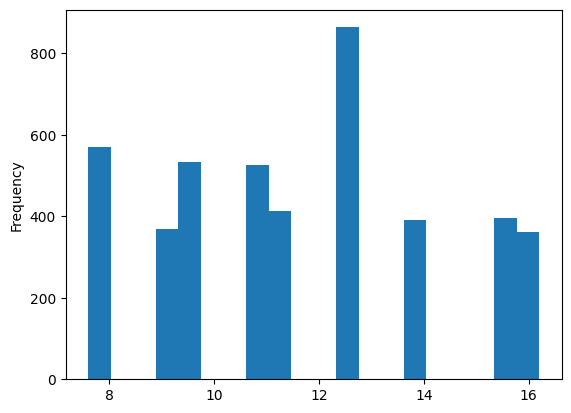

In [69]:
df['Unemployment rate'].plot(kind='hist',bins=20)

In [70]:
# 실업률 구간화
df['Unemployment rate_cut']=pd.qcut(df['Unemployment rate'],q=3,labels=['실업률 낮음','실업률 중간','실업률 높음'])

In [72]:
df['Unemployment rate_cut'].value_counts()

,count
Unemployment rate_cut,
실업률 낮음,1997
실업률 중간,1278
실업률 높음,1149


In [74]:
df[(df['Unemployment rate_cut']=='실업률 높음') &(df['GDP_성장률']=='경기침체')]['Target'].value_counts(normalize=True)

,proportion
Target,
Graduate,0.482213
Dropout,0.366271
Enrolled,0.151515


In [76]:
df[(df['Unemployment rate_cut']=='실업률 낮음') &(df['GDP_성장률']=='경제성장')]['Target'].value_counts(normalize=True)

,proportion
Target,
Graduate,0.472678
Dropout,0.331967
Enrolled,0.195355


In [78]:
df.groupby('Unemployment rate_cut')['Target'].value_counts(normalize=True)


/tmp/ipython-input-78-2660959914.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Unemployment rate_cut')['Target'].value_counts(normalize=True)


Unemployment rate_cut  Target  
실업률 낮음                 Graduate    0.471708
                       Dropout     0.330496
                       Enrolled    0.197797
실업률 중간                 Graduate    0.542254
                       Dropout     0.285603
                       Enrolled    0.172144
실업률 높음                 Graduate    0.499565
                       Dropout     0.344648
                       Enrolled    0.155788
Name: proportion, dtype: float64

GDP와 Inflation rate, 	Unemployment rate은 Target과 관련이 없음

Tuition fees up to date(등록금 납부 상태가 정상인지 여부), 	Scholarship holder(장학금 수혜자인지 여부)


In [20]:
df['Tuition fees up to date'].value_counts()

,count
Tuition fees up to date,
yes,3896
no,528


In [21]:
df['Scholarship holder'].value_counts()

,count
Scholarship holder,
no,3325
yes,1099


Previous qualification(고등학교 입학 전의 학력)과 Target의 관계


In [83]:
df['Previous qualification'].value_counts(normalize=True)

,proportion
Previous qualification,
Secondary education,0.840190
Technological specialization course,0.049503
Basic education 3rd cycle (9th/10th/11th year) or equiv.,0.036618
Higher education - degree,0.028481
Other - 11th year of schooling,0.010172
Higher education - degree (1st cycle),0.009042
Professional higher technical course,0.008137
Higher education - bachelor's degree,0.005199
Frequency of higher education,0.003617


In [84]:
df['Previous qualification_cut']=np.where(df['Previous qualification']=='Secondary education','고등학교 졸업자','기타')

In [88]:
df['Previous qualification_cut'].value_counts(dropna=False)

,count
Previous qualification_cut,
고등학교 졸업자,3717
기타,707


In [89]:
df.groupby('Previous qualification_cut')['Target'].value_counts(normalize=True)

Previous qualification_cut  Target  
고등학교 졸업자                    Graduate    0.522195
                            Dropout     0.290019
                            Enrolled    0.187786
기타                          Dropout     0.485149
                            Graduate    0.379066
                            Enrolled    0.135785
Name: proportion, dtype: float64

In [29]:
df[(df['Tuition fees up to date']=='no')]['Target'].value_counts(normalize=True)

,proportion
Target,
Dropout,0.865530
Enrolled,0.079545
Graduate,0.054924


In [30]:
df[(df['Tuition fees up to date']=='yes')]['Target'].value_counts(normalize=True)

,proportion
Target,
Graduate,0.559548
Dropout,0.247433
Enrolled,0.193018


등록금을 못 낸 학생들이 장학금을 받으면 dropout이 감소함

In [24]:
df[(df['Tuition fees up to date']=='no')&(df['Scholarship holder']=='no')]['Target'].value_counts(normalize=True)

,proportion
Target,
Dropout,0.890041
Enrolled,0.068465
Graduate,0.041494


In [26]:
df[(df['Tuition fees up to date']=='no')&(df['Scholarship holder']=='yes')]['Target'].value_counts(normalize=True)

,proportion
Target,
Dropout,0.608696
Enrolled,0.195652
Graduate,0.195652
